# Loading Libraries and Data

In [14]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc

import re

import pickle
from tqdm import tqdm
import os


import plotly.offline as offline
import plotly.graph_objs as go
offline.init_notebook_mode()
from collections import Counter

In [15]:
data  = pd.read_csv('preprocessed_data.csv', nrows=50000) 
data.head(5)

school_state  ...   price
0           ca  ...  725.05
1           ut  ...  213.03
2           ca  ...  329.00
3           ga  ...  481.04
4           wa  ...   17.74

[5 rows x 9 columns]

# Splitting X and Y

In [16]:
y = data['project_is_approved'].values
X = data.drop(['project_is_approved'], axis=1)
X.head(1)


school_state  ...   price
0           ca  ...  725.05

[1 rows x 8 columns]

# Test and Train split

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

print("="*100)

(37500, 8) (37500,)
(12500, 8) (12500,)


# BOW vectorization

In [18]:
vectorizer = CountVectorizer(min_df=10,ngram_range=(1,4), max_features=5000)
vectorizer.fit(X_train['essay'].values)


X_train_essay_bow = vectorizer.transform(X_train['essay'].values)
X_test_essay_bow = vectorizer.transform(X_test['essay'].values)
print("After vectorizations")
print(X_train_essay_bow.shape, y_train.shape)
print(X_test_essay_bow.shape, y_test.shape)
print("="*100)


After vectorizations
(37500, 5000) (37500,)
(12500, 5000) (12500,)


# tfidf Vectorization

In [19]:
vectorizer2 = TfidfVectorizer(min_df=10,ngram_range=(1,4), max_features=5000)
vectorizer2.fit(X_train['essay'].values)


X_train_essay_tfidf = vectorizer2.transform(X_train['essay'].values)
X_test_essay_tfidf = vectorizer2.transform(X_test['essay'].values)
print("After vectorizations")
print(X_train_essay_tfidf.shape, y_train.shape)
print(X_test_essay_tfidf.shape, y_test.shape)
print("="*100)


After vectorizations
(37500, 5000) (37500,)
(12500, 5000) (12500,)


# School state feature vectorization

In [20]:
vectorizer = CountVectorizer()
vectorizer.fit(X_train['school_state'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_state_ohe = vectorizer.transform(X_train['school_state'].values)
X_test_state_ohe = vectorizer.transform(X_test['school_state'].values)
print("After vectorizations")
print(X_train_state_ohe.shape, y_train.shape)
print(X_test_state_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())

After vectorizations
(37500, 51) (37500,)
(12500, 51) (12500,)
['ak', 'al', 'ar', 'az', 'ca', 'co', 'ct', 'dc', 'de', 'fl', 'ga', 'hi', 'ia', 'id', 'il', 'in', 'ks', 'ky', 'la', 'ma', 'md', 'me', 'mi', 'mn', 'mo', 'ms', 'mt', 'nc', 'nd', 'ne', 'nh', 'nj', 'nm', 'nv', 'ny', 'oh', 'ok', 'or', 'pa', 'ri', 'sc', 'sd', 'tn', 'tx', 'ut', 'va', 'vt', 'wa', 'wi', 'wv', 'wy']


# Teacher prefix 

In [21]:
vectorizer = CountVectorizer()
vectorizer.fit(X_train['teacher_prefix'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_teacher_ohe = vectorizer.transform(X_train['teacher_prefix'].values)
X_test_teacher_ohe = vectorizer.transform(X_test['teacher_prefix'].values)
print("After vectorizations")
print(X_train_teacher_ohe.shape, y_train.shape)
print(X_test_teacher_ohe.shape, y_test.shape)

print(vectorizer.get_feature_names())
print("="*100)

After vectorizations
(37500, 5) (37500,)
(12500, 5) (12500,)
['dr', 'mr', 'mrs', 'ms', 'teacher']


# Project Grade Category

In [22]:
vectorizer = CountVectorizer()
vectorizer.fit(X_train['project_grade_category'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_grade_ohe = vectorizer.transform(X_train['project_grade_category'].values)
X_test_grade_ohe = vectorizer.transform(X_test['project_grade_category'].values)

print("After vectorizations")
print(X_train_grade_ohe.shape, y_train.shape)
print(X_test_grade_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

After vectorizations
(37500, 4) (37500,)
(12500, 4) (12500,)
['grades_3_5', 'grades_6_8', 'grades_9_12', 'grades_prek_2']


# Categories

In [23]:
vectorizer = CountVectorizer()
vectorizer.fit(X_train['clean_categories'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_clean_categories_ohe = vectorizer.transform(X_train['clean_categories'].values)
X_test_clean_categories_ohe = vectorizer.transform(X_test['clean_categories'].values)

print("After vectorizations")
print(X_train_clean_categories_ohe.shape, y_train.shape)
print(X_test_clean_categories_ohe.shape, y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

After vectorizations
(37500, 9) (37500,)
(12500, 9) (12500,)
['appliedlearning', 'care_hunger', 'health_sports', 'history_civics', 'literacy_language', 'math_science', 'music_arts', 'specialneeds', 'warmth']


# Subcategories

In [24]:
vectorizer = CountVectorizer()
vectorizer.fit(X_train['clean_subcategories'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_clean_subcategories_ohe = vectorizer.transform(X_train['clean_subcategories'].values)
X_test_clean_subcategories_ohe = vectorizer.transform(X_test['clean_subcategories'].values)
print("After vectorizations")
print(X_train_clean_subcategories_ohe.shape, y_train.shape)
print(X_train_clean_subcategories_ohe.shape, y_test.shape)

print(vectorizer.get_feature_names())
print("="*100)

After vectorizations
(37500, 30) (37500,)
(37500, 30) (12500,)
['appliedsciences', 'care_hunger', 'charactereducation', 'civics_government', 'college_careerprep', 'communityservice', 'earlydevelopment', 'economics', 'environmentalscience', 'esl', 'extracurricular', 'financialliteracy', 'foreignlanguages', 'gym_fitness', 'health_lifescience', 'health_wellness', 'history_geography', 'literacy', 'literature_writing', 'mathematics', 'music', 'nutritioneducation', 'other', 'parentinvolvement', 'performingarts', 'socialsciences', 'specialneeds', 'teamsports', 'visualarts', 'warmth']


# Vectorization of Numerical  Features

In [25]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
normalizer.fit(X_train['price'].values.reshape(1,-1))

X_train_price_norm = normalizer.transform(X_train['price'].values.reshape(1,-1))
X_test_price_norm = normalizer.transform(X_test['price'].values.reshape(1,-1))

X_train_price_norm=X_train_price_norm.reshape(-1,1)
X_test_price_norm=X_test_price_norm.reshape(-1,1)


print("After vectorizations")
print(X_train_price_norm.shape, y_train.shape)
print(X_test_price_norm.shape, y_test.shape)
print("="*100)




After vectorizations
(37500, 1) (37500,)
(12500, 1) (12500,)


# Teacher no of previous Projects

In [26]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()

normalizer.fit(X_train['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))

X_train_no_of_proj = normalizer.transform(X_train['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))
X_test_no_of_proj= normalizer.transform(X_test['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))

X_train_no_of_proj = X_train_no_of_proj.reshape(-1, 1)
X_test_no_of_proj = X_test_no_of_proj.reshape(-1, 1)


print("After vectorizations")
print(X_train_no_of_proj.shape, y_train.shape)
print(X_test_no_of_proj.shape, y_test.shape)
print("="*100)


After vectorizations
(37500, 1) (37500,)
(12500, 1) (12500,)


# Bow h-stacking

In [27]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039

from scipy.sparse import hstack
X_tr = hstack((X_train_essay_bow, X_train_state_ohe, X_train_teacher_ohe, X_train_grade_ohe, X_train_price_norm,X_train_no_of_proj,X_train_clean_categories_ohe,X_train_clean_subcategories_ohe)).tocsr()
X_te = hstack((X_test_essay_bow, X_test_state_ohe, X_test_teacher_ohe, X_test_grade_ohe, X_test_price_norm,X_test_no_of_proj,X_test_clean_categories_ohe,X_test_clean_subcategories_ohe)).tocsr()
print("Final Data matrix")
print(X_tr.shape, y_train.shape)
print(X_te.shape, y_test.shape)
print("="*150)

Final Data matrix
(37500, 5101) (37500,)
(12500, 5101) (12500,)


# TFIDF h-stacking

In [28]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
X_tr2 = hstack((X_train_essay_tfidf, X_train_state_ohe, X_train_teacher_ohe, X_train_grade_ohe, X_train_price_norm,X_train_no_of_proj,X_train_clean_categories_ohe,X_train_clean_subcategories_ohe)).tocsr()
X_te2 = hstack((X_test_essay_tfidf, X_test_state_ohe, X_test_teacher_ohe, X_test_grade_ohe, X_test_price_norm,X_test_no_of_proj,X_test_clean_categories_ohe,X_test_clean_subcategories_ohe)).tocsr()
print("Final Data matrix")
print(X_tr2.shape, y_train.shape)
print(X_te2.shape, y_test.shape)
print("="*150)

Final Data matrix
(37500, 5101) (37500,)
(12500, 5101) (12500,)


# Hyperparameter tuning on BOW vectorized model

In [29]:
#https://datascience.stackexchange.com/questions/21877/how-to-use-the-output-of-gridsearch
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

clf_nb_bow = MultinomialNB(class_prior=[0.5, 0.5], fit_prior=False)

params = {'alpha':[0.00001, 0.00005, 0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100]}

clf = GridSearchCV(clf_nb_bow, params, cv=10, scoring='roc_auc', verbose=2, return_train_score=True,n_jobs=-1)

clf.fit(X_tr, y_train )


# cv_results_dict
train_auc_bow = clf.cv_results_['mean_train_score']
train_auc_std_bow = clf.cv_results_['std_train_score']

cv_auc_bow = clf.cv_results_['mean_test_score']
cv_auc_std_bow = clf.cv_results_['std_test_score']

best_alpha_1_bow = clf.best_params_['alpha']
best_score_1_bow = clf.best_score_

print('Best Alpha BOW: ', best_alpha_1_bow )
print('Best Score BOW : ', best_score_1_bow)



Fitting 10 folds for each of 15 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    4.5s


Best Alpha BOW:  1e-05
Best Score BOW :  0.6888179121608003


[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:   14.6s finished


100%|██████████| 15/15 [00:00<00:00, 7291.06it/s]


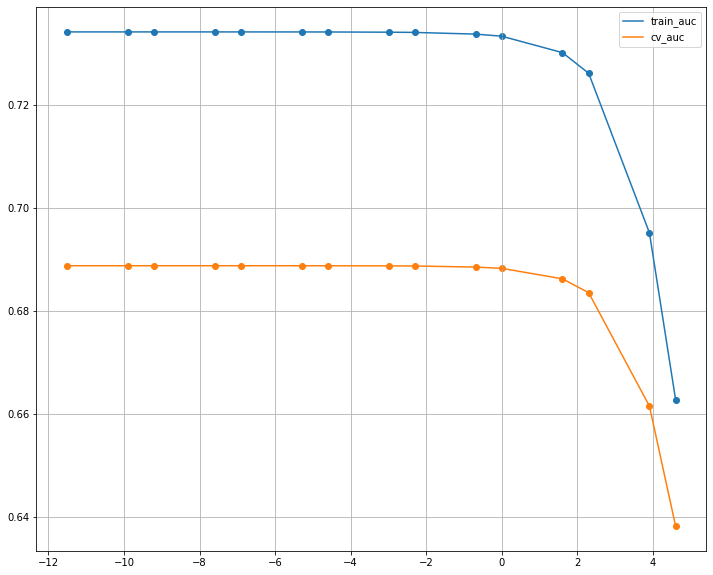

In [30]:
import math
log_alpha = []
alphas=list(params['alpha'])
for i in tqdm(alphas):
    j = math.log(i)
    log_alpha.append(j)
    
plt.figure(figsize=(12,10))
plt.plot(log_alpha, train_auc_bow, label='train_auc')
plt.plot(log_alpha, cv_auc_bow, label='cv_auc')
plt.scatter(log_alpha, train_auc_bow)
plt.scatter(log_alpha, cv_auc_bow)
plt.legend()
plt.grid()
plt.show()

# Testing with best Hyperparameter

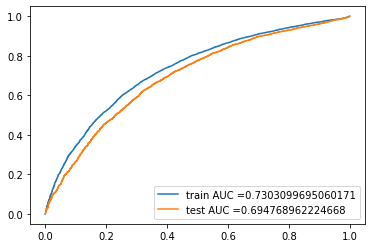

In [31]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html

nb = MultinomialNB(alpha = best_alpha_1_bow,class_prior=[0.5,0.5])
nb.fit(X_tr, y_train)
y_train_predicted = nb.predict_proba( X_tr)[:,1]
y_test_predicted = nb.predict_proba( X_te)[:,1]


train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_predicted)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_predicted)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
test_auc_bow=auc(test_fpr, test_tpr)

In [32]:
def find_best_threshold(threshold, fpr, tpr):
    t = threshold[np.argmax(tpr*(1-fpr))]
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    return t

def predict_with_best_t(proba, threshold):
    predictions = []
    for i in proba:
        if i>=threshold:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

In [33]:
from sklearn.metrics import accuracy_score
best_t = find_best_threshold(te_thresholds, test_fpr, test_tpr)
cm=confusion_matrix(y_test, predict_with_best_t(y_test_predicted, best_t))
acc_bow= accuracy_score(y_test, predict_with_best_t(y_test_predicted, best_t))
print(acc_bow)

the maximum value of tpr*(1-fpr) 0.4232883709926956 for threshold 0.561
0.65352


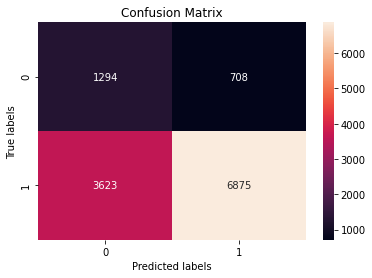

In [34]:
# https://stackoverflow.com/questions/61748441/how-to-fix-the-values-displayed-in-a-confusion-matrix-in-exponential-form-to-nor
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot();
sns.heatmap(cm, annot=True,fmt="d");
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_ylim(2.0, 0)
ax.set_title('Confusion Matrix');


# Hyperparameter tuning for TFIDF vectorized model

In [35]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

clf_nb_bow = MultinomialNB(class_prior=[0.5, 0.5], fit_prior=False)

params = {'alpha':[0.00001, 0.00005, 0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100]}

clf = GridSearchCV(clf_nb_bow, params, cv=10, scoring='roc_auc', verbose=2, return_train_score=True,n_jobs=-1)

clf.fit(X_tr2, y_train )


# cv_results_dict
train_auc_tfidf = clf.cv_results_['mean_train_score']
train_auc_std_tfidf = clf.cv_results_['std_train_score']

cv_auc_tfidf = clf.cv_results_['mean_test_score']
cv_auc_std_tfidf = clf.cv_results_['std_test_score']

best_alpha_1_tfidf = clf.best_params_['alpha']
best_score_1_tfidf = clf.best_score_

print('Best Alpha TFIDF: ', best_alpha_1_tfidf )
print('Best Score TFIDF : ', best_score_1_tfidf)



Fitting 10 folds for each of 15 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    3.4s


Best Alpha TFIDF:  1e-05
Best Score TFIDF :  0.6706477021018664


[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:   13.5s finished


100%|██████████| 15/15 [00:00<00:00, 50696.66it/s]


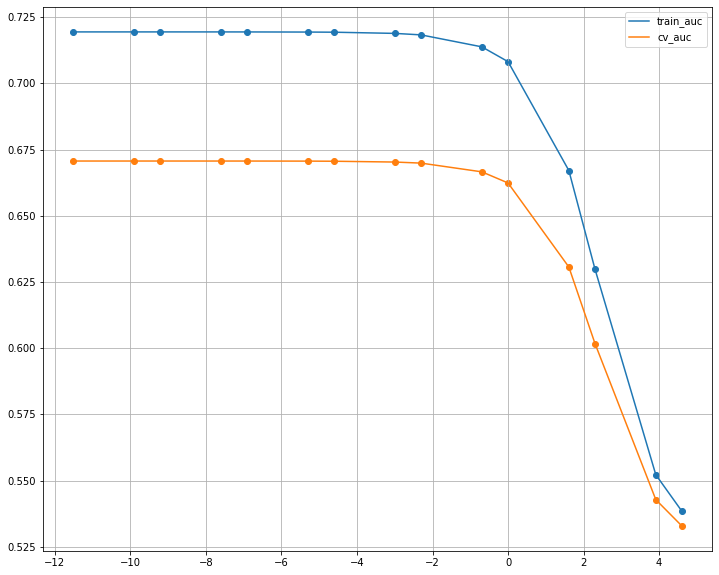

In [36]:
import math
log_alpha = []
alphas=list(params['alpha'])
for i in tqdm(alphas):
    j = math.log(i)
    log_alpha.append(j)
    
plt.figure(figsize=(12,10))
plt.plot(log_alpha, train_auc_tfidf, label='train_auc')
plt.plot(log_alpha, cv_auc_tfidf, label='cv_auc')
plt.scatter(log_alpha, train_auc_tfidf)
plt.scatter(log_alpha, cv_auc_tfidf)
plt.legend()
plt.grid()
plt.show()

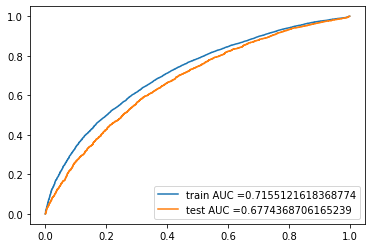

In [37]:
from sklearn.metrics import accuracy_score
nb = MultinomialNB(alpha = best_alpha_1_tfidf,class_prior=[0.5,0.5])
nb.fit(X_tr2, y_train)
y_train_predicted = nb.predict_proba( X_tr2)[:,1]
y_test_predicted = nb.predict_proba( X_te2)[:,1]


train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_predicted)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_predicted)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
test_auc_tfidf=auc(test_fpr, test_tpr)


In [38]:
best_t = find_best_threshold(te_thresholds, test_fpr, test_tpr)
cm=confusion_matrix(y_test, predict_with_best_t(y_test_predicted, best_t))
acc = accuracy_score(y_test, predict_with_best_t(y_test_predicted, best_t)) * 100
acc

the maximum value of tpr*(1-fpr) 0.40067362624040087 for threshold 0.527


60.760000000000005

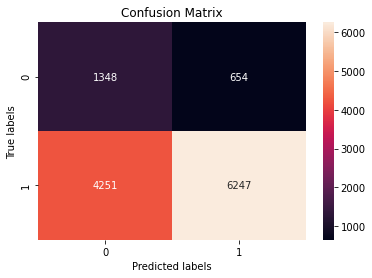

In [39]:
# https://stackoverflow.com/questions/61748441/how-to-fix-the-values-displayed-in-a-confusion-matrix-in-exponential-form-to-nor
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot();
sns.heatmap(cm, annot=True,fmt="d");
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_ylim(2.0, 0)
ax.set_title('Confusion Matrix');


In [40]:
print(test_auc_bow)
print(test_auc_tfidf)
print(best_alpha_1_bow)
print(best_alpha_1_tfidf)

0.694768962224668
0.6774368706165239
1e-05
1e-05


In [41]:
from prettytable import PrettyTable
# Reference link   https://www.geeksforgeeks.org/creating-tables-with-prettytable-library-python/
table= PrettyTable()
table.field_names = ["Vectorizer", "Model", "Alpha--Hyperparameter", "Test-AUC"]
table.add_row(["BOW", "Naive Bayes", best_alpha_1_bow, test_auc_bow])
table.add_row(["TFIDF", "Naive Bayes", best_alpha_1_tfidf, test_auc_tfidf])
print(table)

+------------+-------------+-----------------------+--------------------+
| Vectorizer |    Model    | Alpha--Hyperparameter |      Test-AUC      |
+------------+-------------+-----------------------+--------------------+
|    BOW     | Naive Bayes |         1e-05         | 0.694768962224668  |
|   TFIDF    | Naive Bayes |         1e-05         | 0.6774368706165239 |
+------------+-------------+-----------------------+--------------------+


# Bow model is better than tfidf in this case

In [42]:
# https://stackoverflow.com/questions/50526898/how-to-get-feature-importance-in-naive-bayes#50530697

def get_salient_words(nb_clf, vect, class_ind):
    """Return salient words for given class
    Parameters
    ----------
    nb_clf : a Naive Bayes classifier (e.g. MultinomialNB, BernoulliNB)
    vect : CountVectorizer
    class_ind : int
    Returns
    -------
    list
        a sorted list of (word, log prob) sorted by log probability in descending order.
    """

    words = vect.get_feature_names()
    zipped = list(zip(words, nb_clf.feature_log_prob_[class_ind]))
    sorted_zip = sorted(zipped, key=lambda t: t[1], reverse=True)

    return sorted_zip
# Bow vectorizer

neg_salient_top_20 = get_salient_words(nb, vectorizer, 0)[:20]
pos_salient_top_20 = get_salient_words(nb, vectorizer, 1)[:20]

In [43]:
print(neg_salient_top_20)

[('charactereducation', -8.225552952258365), ('performingarts', -8.460206109609508), ('socialsciences', -8.468126429799634), ('mathematics', -8.918398979365428), ('care_hunger', -8.956500765107387), ('literacy', -9.087183695639846), ('esl', -9.102034658942983), ('communityservice', -9.172752584096763), ('gym_fitness', -9.279306832609276), ('music', -9.279804422399197), ('environmentalscience', -9.616248848050997), ('visualarts', -9.640222294641912), ('financialliteracy', -9.785518819292149), ('civics_government', -9.78728052148303), ('history_geography', -9.794359932724847), ('warmth', -9.834498951450113), ('literature_writing', -9.836455632042792), ('extracurricular', -9.885080898303798), ('parentinvolvement', -9.935224586883267), ('health_lifescience', -9.94455963999085)]


In [44]:
print(pos_salient_top_20)

[('performingarts', -8.31967649052745), ('socialsciences', -8.32913982621644), ('charactereducation', -8.32969199030044), ('mathematics', -8.76874890576407), ('care_hunger', -8.793741596673671), ('literacy', -8.967421563512037), ('esl', -9.00916983931582), ('communityservice', -9.201705198085797), ('gym_fitness', -9.280402673893864), ('music', -9.439490854719221), ('literature_writing', -9.546116775246904), ('visualarts', -9.622262518636486), ('history_geography', -9.629870208841357), ('civics_government', -9.704170067941652), ('teamsports', -9.712201624995487), ('environmentalscience', -9.778988282287699), ('parentinvolvement', -9.838240688505767), ('specialneeds', -9.844443549270554), ('appliedsciences', -9.869324828381346), ('earlydevelopment', -9.93479720278279)]


# feature importance on tfidf model

In [45]:
neg_salient_top_20 = get_salient_words(nb, vectorizer2, 0)[:20]
pos_salient_top_20 = get_salient_words(nb, vectorizer2, 1)[:20]
print(neg_salient_top_20)
print('='*100)
print(pos_salient_top_20)

[('students', -4.88507558947864), ('school', -5.845875630551234), ('learning', -5.9722797527991744), ('classroom', -6.110383119352207), ('my', -6.14103212893758), ('not', -6.253990592868229), ('they', -6.267611117887235), ('learn', -6.2681214861242935), ('help', -6.27432677340964), ('the', -6.355697773810673), ('my students', -6.362860825367866), ('many', -6.447027453447756), ('materials', -6.447709423204549), ('we', -6.472985716122727), ('work', -6.506579343014977), ('need', -6.511562371795446), ('reading', -6.542228862643854), ('year', -6.574105321213956), ('want', -6.593206921679585), ('skills', -6.595075098837107)]
[('students', -4.882611571653438), ('school', -5.881966461060618), ('classroom', -6.074907503301103), ('learning', -6.081426532978454), ('my', -6.127823901489748), ('the', -6.256223077046985), ('they', -6.268842854901271), ('reading', -6.3076580239235245), ('not', -6.316166023038964), ('learn', -6.340222978469767), ('help', -6.349225677631582), ('my students', -6.3637290

#  word cloud of false negative


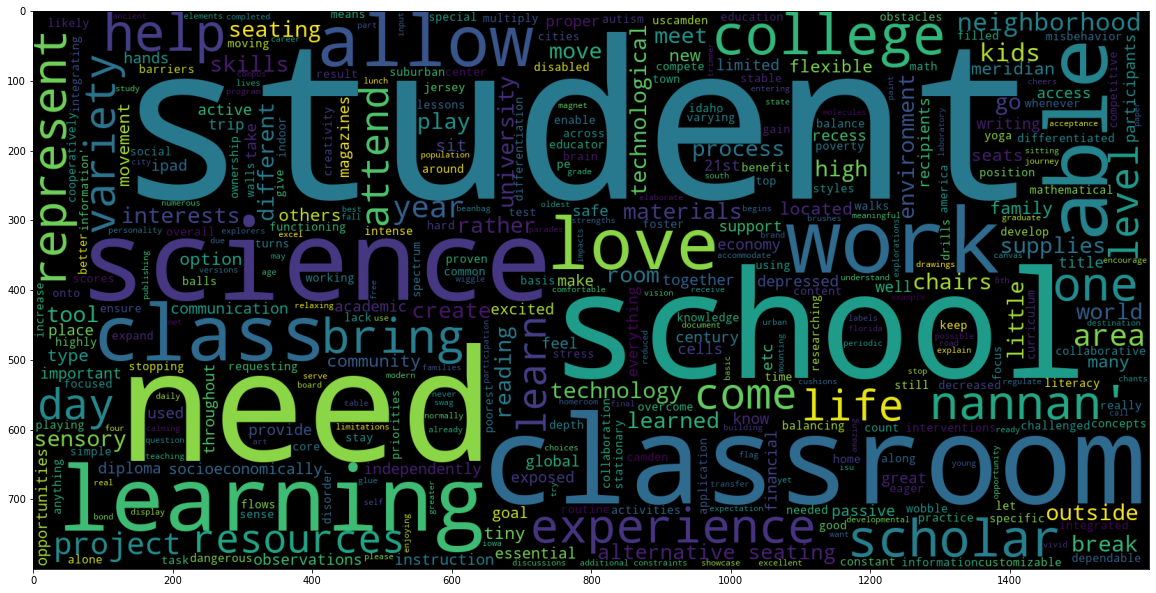

In [46]:
YPREDTEST=predict_with_best_t(y_test_predicted, best_t)
DF1=pd. DataFrame({'y test': y_test, 'y pred': YPREDTEST,'ESSAY':X_test['essay']}) 
DF1

DF2=DF1[(DF1['y test'] ==1 )& (DF1['y pred']==0)] #
corpus=DF2.ESSAY.values

import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS


plt.figure(figsize = (20,15)) 
wc=WordCloud(max_words = 2000,width=1600, height=800).generate(str(corpus))
plt.imshow(wc)

WORD CLOUD ON FALSE POSITIVES

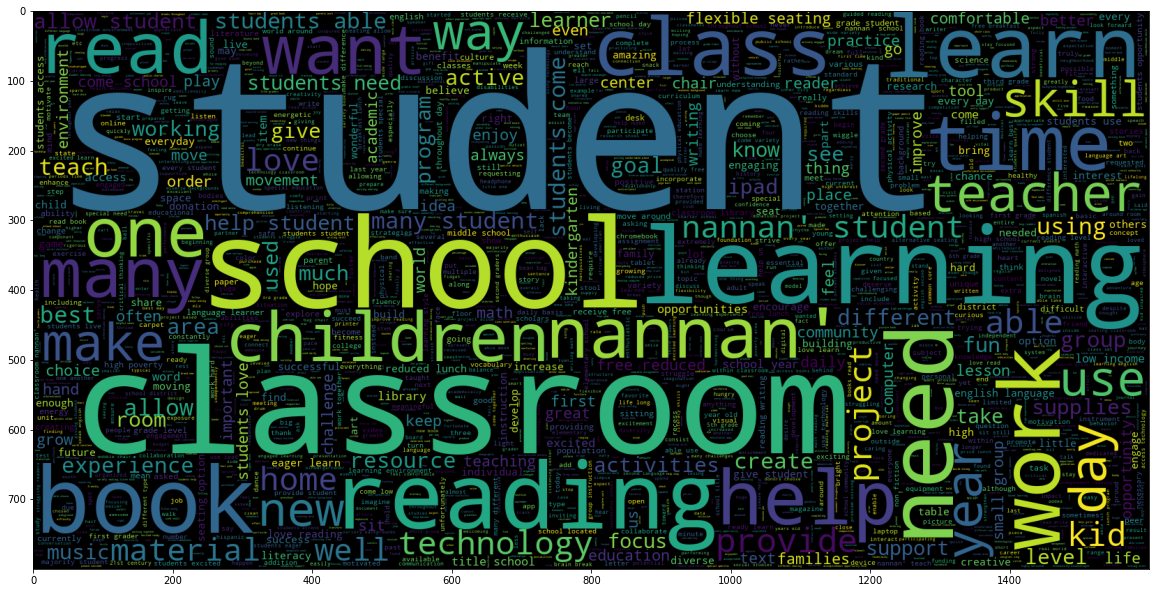

In [47]:
DF3=DF1[(DF1['y test'] ==0 )& (DF1['y pred']==1)] #
corpus=DF3.ESSAY.values

import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS


plt.figure(figsize = (20,15)) 
wc=WordCloud(max_words = 2000,width=1600, height=800).generate(str(corpus))
plt.imshow(wc)